In [1]:
library(readr)
require(sandwich)
require(lmtest)
require(stargazer)

Loading required package: sandwich
Loading required package: lmtest
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: stargazer

Please cite as: 

 Hlavac, Marek (2015). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2. http://CRAN.R-project.org/package=stargazer 



In [2]:
X401ksubs <- read_csv("C:/Users/chris/Desktop/College/Econometrics/Project/401ksubs.csv")

Parsed with column specification:
cols(
  e401k = col_integer(),
  inc = col_double(),
  marr = col_integer(),
  male = col_integer(),
  age = col_integer(),
  fsize = col_integer(),
  nettfa = col_double(),
  p401k = col_integer(),
  pira = col_integer(),
  incsq = col_double(),
  agesq = col_integer()
)


Read in data set as X401ksubs

Part 1

Question 1

In [3]:
datapart1 = X401ksubs[X401ksubs $fsize ==1,]

In [4]:
nrow(datapart1)

[1] 2017

There are 2017 single person households in dataset

Question 2

Create the model

In [5]:
lm.fit = lm(nettfa ~ inc + age, data = datapart1)

In [6]:
stargazer(lm.fit, type = "text")


                        Dependent variable:    
                    ---------------------------
                              nettfa           
-----------------------------------------------
inc                          0.799***          
                              (0.060)          
                                               
age                          0.843***          
                              (0.092)          
                                               
Constant                    -43.040***         
                              (4.080)          
                                               
-----------------------------------------------
Observations                   2,017           
R2                             0.119           
Adjusted R2                    0.118           
Residual Std. Error     44.683 (df = 2014)     
F Statistic          136.465*** (df = 2; 2014) 
Note:               *p<0.1; **p<0.05; ***p<0.01


Holding everything else fixed a one unit increase in income will increase net financial assests by 799 dollars. Holding everthing else fixed a a one unit increase in age will increase net financial assets by 843 dollars. No this is not contrary to my excepectation, in general someone who has more income will have more net financial assests. As a person gets older they generally have more income and therfore have more net financial assets.

Question 3

At the intercept, age is zero and income is zero. The intercept means when someone is born they are 43 thousand dollars in debt.

Question 4

To get t-statistic under null hypothesis. We do point estimate minus the null all over the standard error of age.

In [7]:
tstat = (0.843 - 1) / 0.092

In [8]:
tstat

[1] -1.706522

Since we have 2017 data points we can use Standard Normal Distribution to calculate p-value.

In [9]:
pnorm(-1.70652173913044)

[1] 0.04395549

At the 1% level we do not reject the null, since .04 > .01

Question 5

In [10]:
min(datapart1$age)

[1] 25

In [11]:
sum(datapart1$age == 25)

[1] 99

The youngest age in dataset is 25. There are 99 people in the dataset who are 25 years old. 

Question 6

In [12]:
lm.fit2 = lm(nettfa ~ inc + age + agesq, data = datapart1)

In [13]:
stargazer(lm.fit2, type="text")


                        Dependent variable:    
                    ---------------------------
                              nettfa           
-----------------------------------------------
inc                          0.825***          
                              (0.060)          
                                               
age                           -1.322*          
                              (0.767)          
                                               
agesq                        0.026***          
                              (0.009)          
                                               
Constant                      -1.204           
                             (15.281)          
                                               
-----------------------------------------------
Observations                   2,017           
R2                             0.123           
Adjusted R2                    0.122           
Residual Std. Error     44.605 (df = 20

The fact that age is negative means that our model has some sort of upright parabolic shape. At first for small numbers the age term dominates then as ages get larger the agesq term dominates. I would expect an inverted U shape. In general as one ages net financial assests go up but this growth should slow down as one gets older. Also the age term is also siginificant only at 10% and above level, which makes me skeptical about this model. 

Question 7

In [14]:
datapart1 $age25sq <- (datapart1$age - 25)^2

In [15]:
lm.fit3 = lm(nettfa ~ inc + age + age25sq, data=datapart1)

In [16]:
stargazer(lm.fit3,type="text")


                        Dependent variable:    
                    ---------------------------
                              nettfa           
-----------------------------------------------
inc                          0.825***          
                              (0.060)          
                                               
age                           -0.044           
                              (0.325)          
                                               
age25sq                      0.026***          
                              (0.009)          
                                               
Constant                     -17.181*          
                              (9.973)          
                                               
-----------------------------------------------
Observations                   2,017           
R2                             0.123           
Adjusted R2                    0.122           
Residual Std. Error     44.605 (df = 20

Age is not significant in this model

Question 8

In [17]:
lm.fit4 = lm(nettfa~ inc + age25sq,data = datapart1)

In [18]:
stargazer(lm.fit4 , type= "text")


                        Dependent variable:    
                    ---------------------------
                              nettfa           
-----------------------------------------------
inc                          0.824***          
                              (0.060)          
                                               
age25sq                      0.024***          
                              (0.003)          
                                               
Constant                    -18.488***         
                              (2.178)          
                                               
-----------------------------------------------
Observations                   2,017           
R2                             0.123           
Adjusted R2                    0.122           
Residual Std. Error     44.594 (df = 2014)     
F Statistic          141.038*** (df = 2; 2014) 
Note:               *p<0.1; **p<0.05; ***p<0.01


Both models adjusted R^2 are the same so it can not be determined which model has a better goodness of fit

Question 9

In [19]:
netfa_predicted <- -18.488105 + .8235711*30 + .024403*datapart1$age25sq

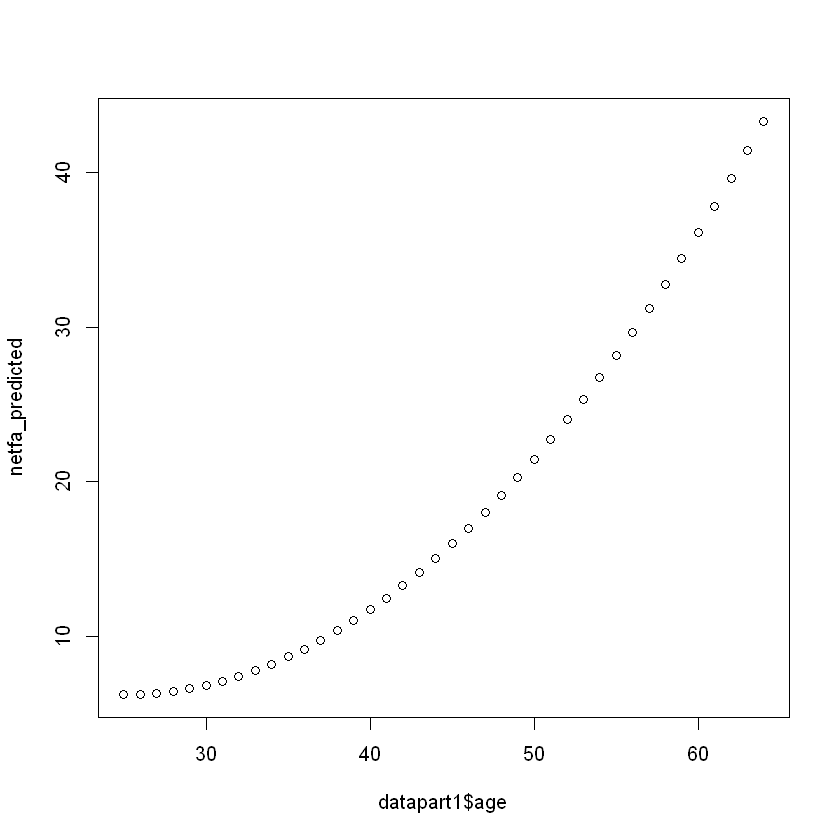

In [20]:
plot(datapart1$age,netfa_predicted) 

For people with an income of 30 thousand dollars, after the age of 25 net financial assets go up as age increases. It seems as if income is the factor that gives us the inverted U shape.

Part 2

Question 1

In [21]:
datapart2 = X401ksubs

In [22]:
table(datapart2$e401k)


   0    1 
5638 3637 

In [23]:
3637/9275

[1] 0.3921294

Question 2

In [24]:
results <- lm(e401k ~ male + age + agesq + inc + incsq,data = datapart2)

In [25]:
stargazer(results,type="text")


                        Dependent variable:    
                    ---------------------------
                               e401k           
-----------------------------------------------
male                          -0.004           
                              (0.012)          
                                               
age                          0.027***          
                              (0.004)          
                                               
agesq                       -0.0003***         
                             (0.00005)         
                                               
inc                          0.012***          
                              (0.001)          
                                               
incsq                       -0.0001***         
                             (0.00000)         
                                               
Constant                     -0.506***         
                              (0.081)  

The estimates for the variables tell us that income and age follow an inverted U-shape. All income variables and age variables are statistically significant so they are are not independent of 401k eligbility. Since the gender variable is not statistically significant it is independent of 401k eligbility.

Question 3

In [26]:
names(results)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [27]:
tmp = results$fitted.values

In [28]:
length(which((tmp < 0 | tmp > 1) == T))

[1] 0

No fitted values are less than zero or greater than 1

Question 4

In [29]:
results2 <- lm(nettfa ~ e401k + age + agesq + inc + incsq,data = datapart2)

In [30]:
stargazer(results2,type = "text")


                        Dependent variable:    
                    ---------------------------
                              nettfa           
-----------------------------------------------
e401k                        9.705***          
                              (1.277)          
                                               
age                          -1.972***         
                              (0.483)          
                                               
agesq                        0.035***          
                              (0.006)          
                                               
inc                          -0.278***         
                              (0.075)          
                                               
incsq                        0.010***          
                              (0.001)          
                                               
Constant                     23.085**          
                              (9.960)  

Holding everything else fixed, A person who is eligible for a 401k will have 9705 more dollars in net financial assets.

Question 5

In [31]:
results3 = lm(nettfa ~ e401k + age + agesq +inc + incsq + I(e401k*(age-41)) + I(e401k*(age-41)^2) , data = datapart2)

In [32]:
stargazer(results3,type ="text")


                           Dependent variable:    
                       ---------------------------
                                 nettfa           
--------------------------------------------------
e401k                           9.960***          
                                 (1.719)          
                                                  
age                             -2.317***         
                                 (0.591)          
                                                  
agesq                           0.036***          
                                 (0.007)          
                                                  
inc                             -0.279***         
                                 (0.074)          
                                                  
incsq                           0.010***          
                                 (0.001)          
                                                  
I(e401k * (age - 41))         

Around the average age of 41, the (e401k * (age-41)) interaction term is significant.

Question 6

In [33]:
stargazer(results2,results3, type="text")


                                       Dependent variable:                
                       ---------------------------------------------------
                                             nettfa                       
                                  (1)                       (2)           
--------------------------------------------------------------------------
e401k                          9.705***                  9.960***         
                                (1.277)                   (1.719)         
                                                                          
age                            -1.972***                 -2.317***        
                                (0.483)                   (0.591)         
                                                                          
agesq                          0.035***                  0.036***         
                                (0.006)                   (0.007)         
                        

The difference between the e401k coefficients is only about 255 dollars. This difference is not much due to peoples net financial assests being on the order of tens of thousands.

Question 7

Adding different family size variables to dataframe

In [34]:
datapart2$fsize1 <- 0 
datapart2$fsize1[datapart2$fsize == 1] <- 1
datapart2$fsize2 <- 0
datapart2$fsize2[datapart2$fsize == 2] <- 1
datapart2$fsize3 <- 0
datapart2$fsize3[datapart2$fsize == 3] <- 1
datapart2$fsize4 <- 0
datapart2$fsize4[datapart2$fsize == 4] <- 1
datapart2$fsize5 <- 0
datapart2$fsize5[datapart2$fsize >= 5] <- 1

Family size of 1 will be excluded from the model to avoid dummy trap.

In [35]:
results4 = lm(nettfa ~ e401k + age + agesq +inc + incsq +fsize2 + fsize3 + fsize4 + fsize5  , data = datapart2)

In [36]:
stargazer(results4, type ="text")


                        Dependent variable:    
                    ---------------------------
                              nettfa           
-----------------------------------------------
e401k                        9.455***          
                              (1.278)          
                                               
age                          -1.495***         
                              (0.495)          
                                               
agesq                        0.029***          
                              (0.006)          
                                               
inc                          -0.240***         
                              (0.075)          
                                               
incsq                        0.010***          
                              (0.001)          
                                               
fsize2                        -0.859           
                              (1.818)  

Only the family size of four and family size of five or more are significant at 1% error.

Question 8

In [37]:
results5 = lm(e401k~ inc + incsq + age + agesq + male , data = datapart2)

This is the usual OLS standard error model for the linear probability model.

In [38]:
stargazer(results5,type ="text")


                        Dependent variable:    
                    ---------------------------
                               e401k           
-----------------------------------------------
inc                          0.012***          
                              (0.001)          
                                               
incsq                       -0.0001***         
                             (0.00000)         
                                               
age                          0.027***          
                              (0.004)          
                                               
agesq                       -0.0003***         
                             (0.00005)         
                                               
male                          -0.004           
                              (0.012)          
                                               
Constant                     -0.506***         
                              (0.081)  

This is the heteroskedasticity-robust version

In [39]:
coeftest(results5,vcov = vcovHC(results5,type="HC1"))


t test of coefficients:

               Estimate  Std. Error  t value  Pr(>|t|)    
(Intercept) -5.0629e-01  7.8554e-02  -6.4451 1.213e-10 ***
inc          1.2446e-02  6.0030e-04  20.7337 < 2.2e-16 ***
incsq       -6.1649e-05  5.0041e-06 -12.3196 < 2.2e-16 ***
age          2.6506e-02  3.8235e-03   6.9325 4.411e-12 ***
agesq       -3.0527e-04  4.3753e-05  -6.9771 3.220e-12 ***
male        -3.5328e-03  1.2052e-02  -0.2931    0.7694    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Looking at the standard errors for both models there are no significant differences between the two versions of the linear probability models.